### Quantum Fourier Transform

The Quantum Fourier Transform (QFT) and its inverse are fundamental quantum algorithms that implement the discrete Fourier transform on quantum amplitudes. They're central to many quantum algorithms, most notably Shor's factoring algorithm.

#### Mathematical Foundation:
The discrete Fourier transform maps a vector of $N$ complex numbers to another vector of $N$ complex numbers. For a quantum state $|x⟩$ in an n-qubit system ($N = 2^n$), the QFT produces:
$QFT|x⟩ = (1/√N) ∑_{y=0}^{N-1} e^{2πixy/N} |y⟩$
The key insight is that this can be decomposed into a product form that's efficiently implementable on quantum hardware.

#### QFT Algorithm Structure:
The QFT on n qubits can be written as:
$|x₁x₂...xₙ⟩ → (1/√2ⁿ)[|0⟩ + e^{2πi0.xₙ}|1⟩] ⊗ [|0⟩ + e^{2πi0.xₙ₋₁xₙ}|1⟩] ⊗ ... ⊗ [|0⟩ + e^{2πi0.x₁x₂...xₙ}|1⟩]$
where $0.xⱼxⱼ₊₁...xₙ$ represents the binary fraction $xⱼ/2 + xⱼ₊₁/4 + ... + xₙ/2^{n-j+1}$.

1. Import libraries:

In [12]:
from numpy import pi
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

#### Circuit Implementation
The QFT circuit proceeds as follows for each qubit $j$ (from $1$ to $n$):
Hadamard gate on qubit $j$: Creates superposition $(|0⟩ + e^{2πi0.xⱼ...xₙ}|1⟩)/√2$

Controlled rotation gates: For each qubit $k > j$, apply a controlled-$R_k$ gate where $R_k$ rotates by $2π/2^k$ when the control qubit is $|1⟩$

The controlled rotations create the proper phase relationships. Specifically, a controlled-$R_k$ gate between qubits $j$ and $k$ contributes the phase factor $e^{2πi·xⱼ·xₖ/2^k}$.

2. Implement the QFT algorithm:

In [13]:
def apply_qft(circuit, n):
    """Apply QFT on the first n qubits in the circuit."""
    for i in range(n):
        circuit.h(i)
        for j in range(i+1, n):
            angle = pi / 2**(j - i)
            circuit.cp(angle, j, i)
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)

3. Create a 3-qubit QFT circuit:

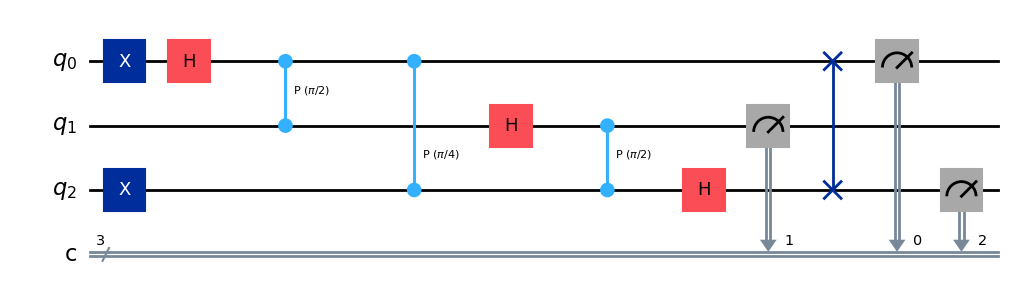

In [14]:
# N qubits:
N = 3
qft_qc = QuantumCircuit(N, N)

# Set an input state:
qft_qc.x(0)
qft_qc.x(2)
#   |5⟩ = |101⟩

# Apply QFT:
apply_qft(qft_qc, N)

# Measure all qubits:
qft_qc.measure(range(N), range(N))

# Draw the QFT circuit:
qft_qc.draw('mpl')

4. Run the algorithm:

Input state: |101⟩ (decimal 5)
Output counts:  {'100': 132, '110': 123, '011': 137, '111': 137, '001': 122, '000': 116, '010': 127, '101': 130}


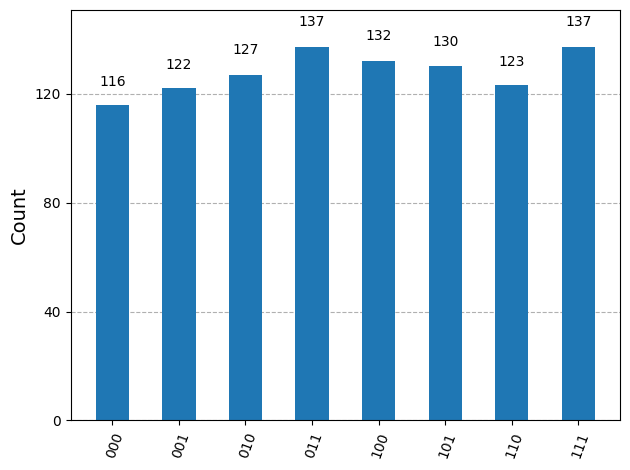

In [15]:
# Simulate the circuit:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qft_qc, shots=1024).result()
counts = result.get_counts()

# Show measurement results:
print("Input state: |101⟩ (decimal 5)")
print("Output counts: ", counts)

# Plot measurements as histogram:
plot_histogram(counts)

#### Key Properties

Time complexity: $O(n²)$ gates for $n$ qubits
Space complexity: $O(n)$ qubits
Approximation: Can be approximated efficiently by truncating small rotation angles
Reversibility: The inverse QFT is obtained by reversing the circuit and taking complex conjugates of rotation angles

### Inverse Quantum Fourier Transform

The inverse QFT ($QFT^†$) simply reverses the process:

- Apply SWAP gates to reverse qubit order
- Apply inverse controlled rotations in reverse order
- Apply Hadamard gates

Mathematically: $QFT^†|y⟩ = (1/√N) ∑_{x=0}^{N-1} e^{-2πixy/N} |x⟩$

In [16]:
def apply_iqft(circuit, n):
    """Apply inverse QFT on the first n qubits in the circuit."""
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)
    for i in reversed(range(n)):
        for j in reversed(range(i+1, n)):
            angle = -pi / 2**(j - i)
            circuit.cp(angle, j, i)
        circuit.h(i)

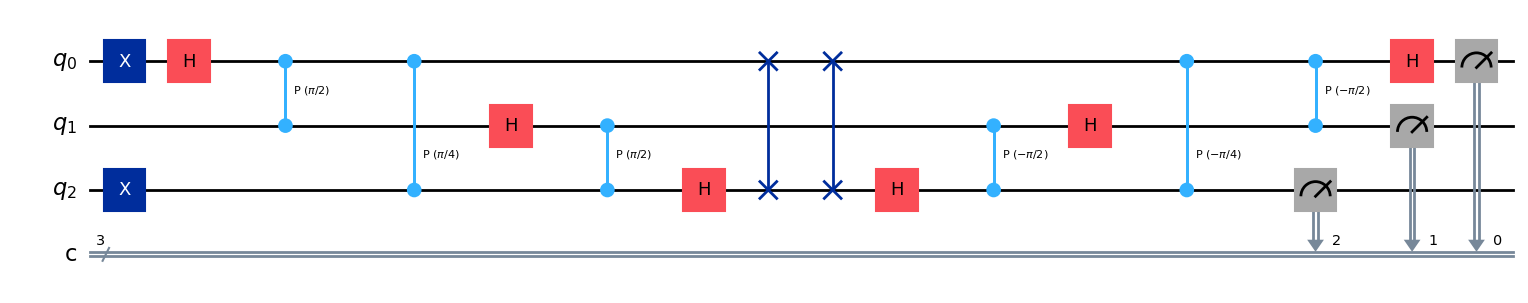

In [17]:
# Inverse QFT circuit:
inv_qft_qc = QuantumCircuit(N, N)

# Set the same input state:
inv_qft_qc.x(0)
inv_qft_qc.x(2)
#   |5⟩ = |101⟩

# Apply QFT, then its inverse:
apply_qft(inv_qft_qc, N)
apply_iqft(inv_qft_qc, N)

# Measure all qubits:
inv_qft_qc.measure(range(N), range(N))

# Draw the inverse QFT circuit:
inv_qft_qc.draw('mpl')

Input: |101⟩ → QFT → inverse QFT → measured output:
Output counts:  {'101': 1024}


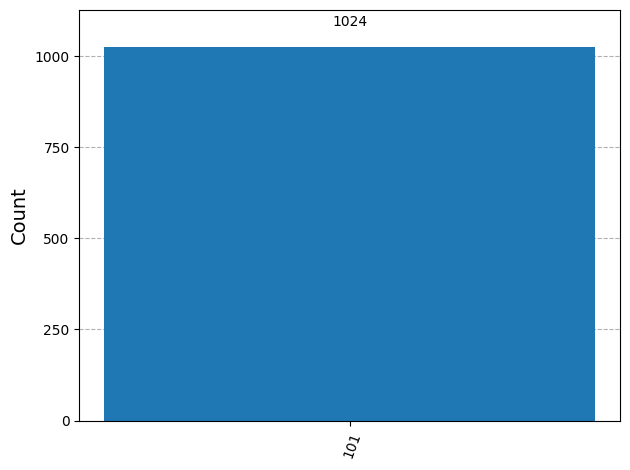

In [18]:
# Simulate the circuit:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(inv_qft_qc, shots=1024).result()
counts = result.get_counts()

# Show measurement results:
print("Input: |101⟩ → QFT → inverse QFT → measured output:")
print("Output counts: ", counts)

# Plot measurements as histogram:
plot_histogram(counts)